# Predictions with multiple points
* Making accurate predictions gets harder with more points
* At any set of weights, there are many values of the error
* ... corresponding to the many points we make predictions for

# Loss function
* Aggregates errors in predictions from many data points into single number
* Measure of model's predictive performance

## Squared error loss function

In [1]:
import pandas as pd
errors = pd.DataFrame({'prediction': [10,8,6], 'actual': [20,3,1]})\
    .assign(error = lambda x: x['prediction']-x['actual'],
            squarederror = lambda x: x['error']**2)
errors

,prediction,actual,error,squarederror
0,10,20,-10,100
1,8,3,5,25
2,6,1,5,25


In [2]:
errors.squarederror.sum()

150

**Mean Squared Error (MSE)**

In [3]:
errors.squarederror.mean()

50.0

## Loss function
* Lower loss function value means a better model
* Goal: Find the weghts that give the lowest value for the loss functions
* Gradient descent

## Gradient descent
* Imagine you are in a pitch dark field
* Want to find the lowest point
* Feel the ground to see how it slopes
* Take a small step downhill
* Repeat until it uphill in every direction

## Gradient descent steps
* Start at random point
* Until you are somewhere flat:
    * Find the slope
    * Take a step downhil

## Scaling up to multiple data points

In [4]:
import numpy as np
def predict_with_singlelayer_2nodes_network(input_data_row, weights):
    # Calculate node 0 value
    node_0_input = input_data_row @ weights['node_0']
    node_0_output = relu(node_0_input)
    # Calculate node 1 value
    node_1_input = input_data_row @ weights['node_1']
    node_1_output = relu(node_1_input)
    # copy node outputs to hidden layer
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    # Calculate model output
    input_to_final_layer = hidden_layer_outputs @ weights['output']
    model_output = relu(input_to_final_layer )
    # Return model output
    return model_output

In [5]:
def relu(input):
    return max(0, input)

In [6]:
# Does the forward propagantion
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
# weights for a fully connected model of a single hidden layer of two nodes
weights_0 = {
    "node_0": np.array([2, 1]),
    "node_1": np.array([1, 2]),
    "output": np.array([1, 1]),
}
weights_1 = {
    "node_0": np.array([2, 1]),
    "node_1": np.array([1.0, 1.5]),
    "output": np.array([1.0, 1.5]),
}
# Create model_output_0 
model_output_0 = []
# Create model_output_1
model_output_1 = []
# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_singlelayer_2nodes_network(row, weights_0))
    # Append prediction to model_output_1
    model_output_1.append(predict_with_singlelayer_2nodes_network(row, weights_1))

In [7]:
from sklearn.metrics import mean_squared_error

target_actuals = [1, 3, 5, 7]  
# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)
# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


# Gradient descent
* If the slope is positive:
    * Going opposite the slope means moving to lower loss numbers
    * Subtract the slope from the current value
    * Too big a step might lead us astray
* Solution: learning rate
    * Update each weight by subtracting learning rate * slope
    
> Learning rate are fequently around 0.01

## Slope calculation example

(3) > 2 > (6) actual target value = 10

* To calculate the slope for a weight, need to multiply:
1. Slope of the loss function w.r.t value at the node we feed into
2. The value of the node that feeds into our weight
3. Slope of the activation function w.r.t value we feed into
    
* Slope of mean-squared loss function w.r.t prediction:
    * 2 * error
    * 2 * (Predicted Value - Actual Value)
    * 2 * -4 = -8
    
* The value of the node that feeds into our weight
    * 3
    
* Slope of the activation function w.r.t value we feed into
    * only if he ave an activation function
    * None here

In [8]:
#slope
2 * (-4 * 3)

-24

If learning rate is 0.01, the new weight would be:

$$new\_weight = 2 - learning\_rate \times slope$$

In [9]:
# new weight
2 - 0.01 * (-24)

2.24

## Code to calculate slopes and update weights

### "the neural network"

3 ->1-> ( )  
4 ->2-^ 

In [10]:
import numpy as np
weights = np.array([1, 2])
input_data = np.array([3, 4]) # single data point
target = 6
learning_rate = 0.01
runs=0

### The Gradient Descent Loop

> Run following cell 55 times or until the gradient is zero, after that, coefficients no longer change

In [11]:
# computer error
preds = (weights * input_data).sum() # same as weights @ input_data
error = preds - target
if error !=0:
    # Gradient is the mathematical term for this array of slopes
    gradient = 2 * input_data * error
    # pairwise substraction: weights minus the gradients times learning rate
    weights = weights - learning_rate * gradient
    runs+=1
print(f'{preds=} {error=}')
print(f'{gradient=}')
print(f'{weights=}')
print(f'{runs=}')

preds=11 error=5
gradient=array([30, 40])
weights=array([0.7, 1.6])
runs=1


## Making multiple updates to weights

In [12]:
import numpy as np

In [13]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

In [14]:
def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors**2)
    return mse

In [15]:
def get_slope(input_data, target, weights):
    # slop of the loss function w.r.t. to each weight
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

In [16]:
input_data = np.array([1, 2, 3])
weights = np.array([0, 2, 1])
target = 0
n_updates = 20
mse_hist = []
learning_rate = 0.01
print(f'{target=}')
print(f'{n_updates=}')

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slopes = get_slope(input_data, target, weights)
    # print(f'#{i+1} {input_data=:}')
    # print(f'  {weights=}')
    # print(f'    error={get_error(input_data, target, weights)}')
    # print(f'      {slopes=}')
    # Update the weights: weights
    weights = weights - learning_rate * slopes
    # print(f'        {weights=}')
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    # print(f'          error={get_error(input_data, target, weights)}')
    # print(f'            {mse=}', end='\n')
    # Append the mse to mse_hist
    mse_hist.append(mse)
    
prediction = input_data @ weights
print(f'final {prediction=}')    
print(f'final {weights=}')
# Calculate mse with new weights: mse
mse = get_mse(input_data, target, weights)
print(f'final error={get_error(input_data, target, weights)}')
print(f'final {mse=}', end='\n')    

target=0
n_updates=20
final prediction=0.009811783767493754
final weights=array([-0.49929916,  1.00140168, -0.49789747])
final error=0.009811783767493809
final mse=9.627110070005501e-05


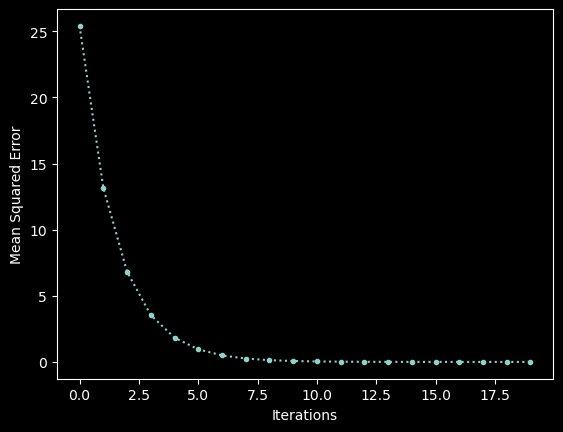

In [17]:
# Plot the mse history
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.plot(mse_hist, '.:')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# Backpropagation

* Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
* Comes from chain rule of calculus
* Important to understand the process, but you will generally use a library that implements this

## Backpropagation process
* Trying to estimate the slope of the loss function w.r.t each weight
* Do forward propagation to calculate predictions and errors

1. Go back one layer at a time
2. Gradients for weight is product of:
    1. Node value feeding into that weight
    2. Slope of loss function w.r.t node it feeds into
    3. Slope of activation function at the node it feeds into
    
* Need to also keep track of the slopes of the loss function w.r.t node values
* Slope of node values are the sum of the slopes for all weights that come out of them

> Each time you generate predictions using forward propagation, you update the weights using backward propagation.Each time you generate predictions using forward propagation, you update the weights using backward propagation.

## Thinking about backward propagation

If your predictions were all exactly right, and your errors were all exactly 0, the slope of the loss function with respect to your predictions would also be 0. In that circumstance:

> The updates to all weights in the network would indeed also be 0.

## Backpropagation in practice

## Calculating slopes associated with any weight
* Gradients for weight is product of:
1. Node value feeding into that weight
2. Slope of activation function for the node being fed into
3. Slope of loss function w.r.t output node

## Backpropagation: Recap
* Start at some random set of weights
* Use forward propagation to make a prediction
* Use backward propagation to calculate the slope of the loss function w.r.t each weight
* Multiply that slope by the learning rate, and subtract from the current weights
* Keep going with that cycle until we get to a flat part

## Stochastic gradient descent
* **For computational efficiency** it is common to calculate slopes on only a subset of the data: (a batch)
* Use a different batch of data to calculate the next update
* Start over from the beginning once all data is used
* Each time through the training data is called an epoch
* When slopes are calculated on one batch at a time that scalled **stochastic gradient descent**